In [1]:
!python --version

Python 3.10.14


In [2]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pwd

/home/user/energygpt/chronos


In [4]:
# datasets = ['BDG-2_c_168_h_96', 'Electricity_c_168_h_96', 'Buildings-900K-test_c_168_h_96']
datasets = ['BDG-2', 'Electricity', 'Buildings-900K-test']
# datasets = ['Electricity', 'Electricity_test']

In [5]:
def load_results(datasets, result_type):
    results = []
    for dataset in datasets:
        print(dataset)
        files = glob.glob(f'/home/user/energygpt/chronos/results/{dataset}/{result_type}*.csv')
        b_count = 0
        for f in files:            
            df = pd.read_csv(f)
            print(f, df.shape)
            #df = df[df.NRMSE <=1]
            print(f, df.shape, ' After filtering')
            df.insert(0, 'dataset', dataset)
            df.insert(0, 'result_type', result_type)
            df['filename'] = df.filename.apply(lambda s: os.path.basename(s))
            results.append(df)                
            b_count += df.shape[0]
        print(dataset, b_count, '\n')
            
    results_df = pd.concat(results)
    return results_df

In [6]:
result_type = 'agg_metrics'
test_agg = load_results(datasets, result_type)
print(test_agg.shape)

# result_type = 'finetuned_agg_metrics'
# finetuned_agg = load_results(datasets, result_type)
# print(finetuned_agg.shape)

BDG-2
/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Fox_clean=2016.csv (132, 9)
/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Fox_clean=2016.csv (132, 9)  After filtering
/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Panther_clean=2017.csv (105, 9)
/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Panther_clean=2017.csv (105, 9)  After filtering
/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Bear_clean=2016.csv (78, 9)
/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Bear_clean=2016.csv (78, 9)  After filtering
/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Bear_clean=2017.csv (91, 9)
/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Bear_clean=2017.csv (91, 9)  After filtering
/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Rat_clean=2017.csv (262, 9)
/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Rat_clean=2017.csv (262, 9)  After filtering
/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Rat_clean=2016.c

In [7]:
# test_agg.columns
test_agg[['NRMSE']].describe()

,NRMSE
count,2802.000000
mean,0.184169
std,0.181252
min,0.014372
25%,0.084696
50%,0.135595
75%,0.229733
max,4.393452


In [8]:
# finetuned_agg.dataset.value_counts().sum() + 1435
# test_agg = test_agg[test_agg.NRMSE <=1]

In [9]:
test_agg[['SMAPE', 'NRMSE']].describe()

,SMAPE,NRMSE
count,2802.000000,2802.000000
mean,0.109985,0.184169
std,0.073975,0.181252
min,0.009220,0.014372
25%,0.055887,0.084696
50%,0.087498,0.135595
75%,0.142559,0.229733
max,0.694484,4.393452


## agg - Test - ALL

In [10]:
# For 168
combined = test_agg#pd.concat([test_agg, finetuned_agg])

combined.result_type = combined.result_type.str.replace('test_agg_metrics', 'Zero-shot')
combined.result_type = combined.result_type.str.replace('finetuned_agg_metrics', 'Fine-tuned')

cols = ['result_type', 'SMAPE', 'NRMSE']
res_agg1 = combined[cols].groupby(['result_type']).agg( {'SMAPE': ['mean', 'std', 'median'],
                                                        'NRMSE': ['mean', 'std', 'median']})

# res_agg1.mul(100).round(2).to_csv('./results_finetuned/commercial.csv')
# res_agg1.mul(100).round(2).to_latex('./results_finetuned/commercial.tex')
res_agg1.mul(100).round(2)

SMAPE              NRMSE              
             mean  std median   mean    std median
result_type                                       
agg_metrics  11.0  7.4   8.75  18.42  18.13  13.56

In [7]:
# For 24
combined = test_agg#pd.concat([test_agg, finetuned_agg])

combined.result_type = combined.result_type.str.replace('test_agg_metrics', 'Zero-shot')
combined.result_type = combined.result_type.str.replace('finetuned_agg_metrics', 'Fine-tuned')

cols = ['result_type', 'SMAPE', 'NRMSE']
res_agg1 = combined[cols].groupby(['result_type']).agg( {'SMAPE': ['mean', 'std', 'median'],
                                                        'NRMSE': ['mean', 'std', 'median']})

# res_agg1.mul(100).round(2).to_csv('./results_finetuned/commercial.csv')
# res_agg1.mul(100).round(2).to_latex('./results_finetuned/commercial.tex')
res_agg1.mul(100).round(2)

SMAPE                NRMSE              
              mean    std median   mean    std median
result_type                                          
agg_metrics  16.66  10.06  13.77  25.49  22.73  19.63

In [14]:
# For 24
#combined = pd.concat([test_agg, finetuned_agg])
#cols = ['result_type', 'dataset', 'sMAPE', 'NRMSE']
cols = ['result_type', 'dataset', 'NRMSE', 'SMAPE', 'MAE', 'MSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset']).agg( {'SMAPE': ['median'],
                                                                    'NRMSE': ['median'],
                                                                    'MAE': ['median']})
                                                                    
    # 'NRMSE': ['median']})

# res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
# res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
res_agg2.mul(100).round(2)

SMAPE  NRMSE      MAE
                                median median   median
result_type dataset                                   
agg_metrics BDG-2                 9.95  15.72   586.39
            Buildings-900K-test  17.20  27.96   625.50
            Electricity           5.94   9.00  1031.85

In [12]:
combined.filename.value_counts()/2

filename
LD2011_2014_clean=2014.csv    178.5
LD2011_2014_clean=2013.csv    165.5
LD2011_2014_clean=2012.csv    157.5
Rat_clean=2016.csv            138.5
G42000900.csv                 133.5
Rat_clean=2017.csv            131.0
LD2011_2014_clean=2011.csv     78.0
G27002300.csv                  71.5
Fox_clean=2017.csv             66.5
Fox_clean=2016.csv             66.0
Panther_clean=2017.csv         52.5
Bear_clean=2017.csv            45.5
G51059305.csv                  41.5
Bear_clean=2016.csv            39.0
G06000702.csv                  36.0
Name: count, dtype: float64

## add - Test vs. Finetuned - by dataset

In [13]:
# For 168
#combined = pd.concat([test_agg, finetuned_agg])
#cols = ['result_type', 'dataset', 'sMAPE', 'NRMSE']
cols = ['result_type', 'dataset', 'NRMSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})

# res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
# res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
res_agg2.mul(100).round(2)

NRMSE
                                median
result_type dataset                   
agg_metrics BDG-2                15.72
            Buildings-900K-test  27.96
            Electricity           9.00

In [8]:
# For 24
#combined = pd.concat([test_agg, finetuned_agg])
#cols = ['result_type', 'dataset', 'sMAPE', 'NRMSE']
cols = ['result_type', 'dataset', 'NRMSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})

# res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
# res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
res_agg2.mul(100).round(2)

NRMSE
                                   median
result_type dataset                      
agg_metrics BDG-2_24                19.59
            Buildings-900K-test_24  34.75
            Electricity_24          15.28

In [9]:
# For 96
#combined = pd.concat([test_agg, finetuned_agg])
#cols = ['result_type', 'dataset', 'sMAPE', 'NRMSE']
cols = ['result_type', 'dataset', 'NRMSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})

# res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
# res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
res_agg2.mul(100).round(2)

NRMSE
                                   median
result_type dataset                      
agg_metrics BDG-2_96                18.17
            Buildings-900K-test_96  32.18
            Electricity_96          10.00

In [14]:
#combined = pd.concat([test_agg, finetuned_agg])
#cols = ['result_type', 'dataset', 'sMAPE', 'NRMSE']
cols = ['result_type', 'dataset', 'filename', 'NRMSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset', 'filename']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})

#res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
#res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
res_agg2.mul(100).round(2)

NRMSE
                                                           median
result_type dataset             filename                         
agg_metrics BDG-2               Bear_clean=2016.csv         12.73
                                Bear_clean=2017.csv         15.26
                                Fox_clean=2016.csv          13.62
                                Fox_clean=2017.csv          13.89
                                Panther_clean=2017.csv      12.41
                                Rat_clean=2016.csv          16.37
                                Rat_clean=2017.csv          17.59
            Buildings-900K-test G06000702.csv               13.45
                                G27002300.csv               29.42
                                G42000900.csv               29.37
                                G51059305.csv               28.86
            Electricity         LD2011_2014_clean=2011.csv   7.77
                                LD2011_2014_clean=2012.csv   9.33
                                LD2011_2014_clean=2013.csv   9.68
                                LD2011_2014_clean=2014.csv   9.53

In [15]:
combined

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL
0,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_lodging_Stephen,6.585594,43.370047,4.390836,0.052777,0.051054,0.080739,0.693951
1,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_education_Virginia,7.305732,53.373726,3.750670,0.468725,0.325889,0.662080,0.815909
2,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_lodging_Stephan,2.477205,6.136543,1.679378,0.056696,0.054966,0.080852,0.649219
3,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_office_Israel,16.635654,276.744975,10.767507,0.099055,0.088836,0.134294,0.643978
4,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_education_Lilly,20.419247,416.945651,12.219198,0.065485,0.062883,0.107479,0.785425
...,...,...,...,...,...,...,...,...,...,...,...
67,agg_metrics,Buildings-900K-test,G06000702.csv,323861,6.948221,48.277782,4.872857,0.074479,0.074308,0.084884,0.784415
68,agg_metrics,Buildings-900K-test,G06000702.csv,325070,4.502525,20.272730,3.219182,0.066218,0.064895,0.075530,0.718038
69,agg_metrics,Buildings-900K-test,G06000702.csv,331630,6.447165,41.565939,4.768288,0.098081,0.096143,0.113318,0.749165
70,agg_metrics,Buildings-900K-test,G06000702.csv,341525,5.390236,29.054646,4.006897,0.348134,0.283072,0.393512,0.853207


Index(['Electricity', 'BDG-2', 'Buildings-900K-test'], dtype='object', name='dataset')


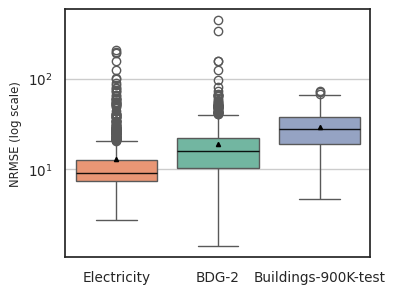

In [46]:
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

rc = {
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.family':'serif',
      'font.size' : 12}
plt.rcParams.update(rc)

#seaborn.set(style='whitegrid')
seaborn.set(style='white', font_scale=0.7)


plt.figure(figsize=(4, 3))
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"


test_agg1 = combined.copy()
#map_names = {'BDG-2-50epoch': 'BDG-2', 'Electricity-50epoch': 'Electricity', 'Buildings-900K-test-50epoch': 'Buildings-900K-test'}
#test_agg1['dataset'] = test_agg1['dataset'].map(map_names)

test_agg1.NRMSE = test_agg1.NRMSE * 100
#test_agg1['building_type'] = test_agg1.building.apply(lambda s: s.split('_')[1])
#test_agg1['site'] = test_agg1.building.apply(lambda s: s.split('_')[0])
#test_agg1.building_type = test_agg1.building_type.str.capitalize()

# Find the order
my_order = test_agg1.groupby(by=["dataset"])["NRMSE"].median().sort_values().index
print(my_order)

res = seaborn.boxplot(x='dataset', y='NRMSE', fill=True, hue='dataset',
                      order=my_order,                       
                medianprops=dict(color="black", alpha=0.9),
                      showmeans=True,
                meanprops={
                       "markeredgecolor": "black",
                       "markersize": "3",
                'markerfacecolor':'black'},
                      palette='Set2',
                data=test_agg1,
                     legend=False)
res.tick_params(labelsize=9.8)
res.set_yscale('log')

plt.title(label='')

plt.ylabel("NRMSE (log scale)")
# plt.ylim(0,120)
plt.xlabel("")
#plt.xticks(rotation=90)
plt.grid(axis='y')
plt.gcf().tight_layout()
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
#plt.legend()
plt.savefig("chronos-nrmse-error-commercial-dataset-boxplot.pdf", bbox_inches='tight')
plt.show()

In [47]:
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 8.5})
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["figure.figsize"] = (3.5, 3.5)
# # plt.figure(figsize=(3, 3))

# copy_df = test_agg['NRMSE'].reset_index()
# all_df = pd.DataFrame(copy_df['NRMSE'] * 100)
# #assembly_df
# all_df['cdf'] = all_df.rank(method = 'average', pct = True)
# all_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True, color='black')
# median = all_df.sort_values('NRMSE').quantile(0.5)
# plt.scatter(x = median['NRMSE'], y = median['cdf'], color = 'red')
# #plt.text(x = xmedian['NRMSE'], median['cdf'])
# plt.text(median['NRMSE'],  median['cdf'], '({}, {})'.format(median['NRMSE'].round(2),  median['cdf'].round(2)))
# q_25 = all_df.sort_values('NRMSE').quantile(0.25)
# plt.scatter(x = q_25['NRMSE'], y = q_25['cdf'], color = 'red')
# plt.text(q_25['NRMSE'],  q_25['cdf'], '({}, {})'.format(q_25['NRMSE'].round(2),  q_25['cdf'].round(2)))
# q_75 = all_df.sort_values('NRMSE').quantile(0.75)
# plt.scatter(x = q_75['NRMSE'], y = q_75['cdf'], color = 'red')
# plt.text(q_75['NRMSE'],  q_75['cdf'], '({}, {})'.format(q_75['NRMSE'].round(2),  q_75['cdf'].round(2)))
# q_90 = all_df.sort_values('NRMSE').quantile(0.9)
# plt.scatter(x = q_90['NRMSE'], y = q_90['cdf'], color = 'red')
# plt.text(q_90['NRMSE'],  q_90['cdf'], '({}, {})'.format(q_90['NRMSE'].round(2),  q_90['cdf'].round(2)))
# copy_df = test_agg.reset_index()
# copy_df['NRMSE'] = copy_df['NRMSE'] * 100
# copy_df = copy_df.sort_values('NRMSE')
# seaborn.ecdfplot(data=copy_df, x="NRMSE", hue='dataset')

# plt.title(label='')

# plt.ylabel("CDF")
# #plt.ylim(0,125)
# plt.xlabel("NRMSE")
# #plt.xticks(rotation=90)
# plt.grid(axis='y')
# plt.gcf().tight_layout()
# #plt.legend()
# plt.subplots_adjust(wspace=0.05, hspace=0)
# plt.savefig("chronos-commercial-error-cdfplot.pdf", bbox_inches='tight')
# plt.show()

In [46]:
# sns.set(style="whitegrid", font_scale=1)  # crazy big
# # sns.set_theme(style="whitegrid")

# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 14})
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["figure.figsize"] = (5, 3.3)
# # plt.figure(figsize=(3, 3))

# copy_df = test_agg['NRMSE'].reset_index()
# all_df = pd.DataFrame(copy_df['NRMSE'] * 100)


# #assembly_df
# all_df['cdf'] = all_df.rank(method = 'average', pct = True)
# ax1 = all_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True, color='black')
# # median = all_df.sort_values('NRMSE').quantile(0.5)
# # plt.scatter(x = median['NRMSE'], y = median['cdf'], color = 'red')
# # #plt.text(x = xmedian['NRMSE'], median['cdf'])
# # plt.text(median['NRMSE'],  median['cdf'], '({}, {})'.format(median['NRMSE'].round(2),  median['cdf'].round(2)))
# # q_25 = all_df.sort_values('NRMSE').quantile(0.25)
# # plt.scatter(x = q_25['NRMSE'], y = q_25['cdf'], color = 'red')
# # plt.text(q_25['NRMSE'],  q_25['cdf'], '({}, {})'.format(q_25['NRMSE'].round(2),  q_25['cdf'].round(2)))
# # q_75 = all_df.sort_values('NRMSE').quantile(0.75)
# # plt.scatter(x = q_75['NRMSE'], y = q_75['cdf'], color = 'red')
# # plt.text(q_75['NRMSE'],  q_75['cdf'], '({}, {})'.format(q_75['NRMSE'].round(2),  q_75['cdf'].round(2)))
# # q_90 = all_df.sort_values('NRMSE').quantile(0.9)
# # plt.scatter(x = q_90['NRMSE'], y = q_90['cdf'], color = 'red')
# # plt.text(q_90['NRMSE'],  q_90['cdf'], '({}, {})'.format(q_90['NRMSE'].round(2),  q_90['cdf'].round(2)))
# copy_df = test_agg.reset_index()
# copy_df['NRMSE'] = copy_df['NRMSE'] * 100
# copy_df = copy_df.sort_values('NRMSE')
# ax = seaborn.ecdfplot(data=copy_df, x="NRMSE", hue='dataset')
# sns.move_legend(ax, "lower right", title='', labelspacing=0.05)


# #plt.xlim(0,80)

# ax.set_xscale('log')

# plt.title(label='')

# plt.ylabel("CDF")
# #plt.ylim(0,125)
# plt.xlabel("NRMSE (log scale)")
# #plt.xticks(rotation=90)
# plt.grid(axis='y')
# plt.gcf().tight_layout()
# #plt.legend()
# plt.subplots_adjust(wspace=0.05, hspace=0)
# plt.savefig("chronos-commercial-error-cdfplot.pdf", bbox_inches='tight')
# plt.show()

/tmp/ipykernel_976034/2505307171.py:39: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lines, linestyle, legend_handle in zip(ax.lines[::-1], ['-', '--', 'dashdot'], ax.legend_.legendHandles):


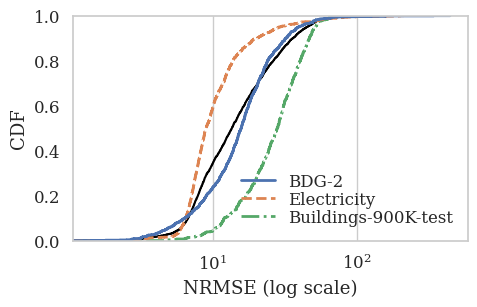

In [45]:
sns.set(style="whitegrid", font_scale=1.09)  # crazy big
# sns.set_theme(style="whitegrid")

date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.figsize"] = (5, 3.3)
# plt.figure(figsize=(3, 3))
fig, ax = plt.subplots()

copy_df = test_agg['NRMSE'].reset_index()
all_df = pd.DataFrame(copy_df['NRMSE'] * 100)


#assembly_df
all_df['cdf'] = all_df.rank(method = 'average', pct = True)
# ax1 = all_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True, color='black', ax=ax)
ax_c = seaborn.ecdfplot(data=all_df.sort_values('NRMSE'), x="NRMSE", ax=ax, color='black')
# median = all_df.sort_values('NRMSE').quantile(0.5)
# plt.scatter(x = median['NRMSE'], y = median['cdf'], color = 'red')
# #plt.text(x = xmedian['NRMSE'], median['cdf'])
# plt.text(median['NRMSE'],  median['cdf'], '({}, {})'.format(median['NRMSE'].round(2),  median['cdf'].round(2)))
# q_25 = all_df.sort_values('NRMSE').quantile(0.25)
# plt.scatter(x = q_25['NRMSE'], y = q_25['cdf'], color = 'red')
# plt.text(q_25['NRMSE'],  q_25['cdf'], '({}, {})'.format(q_25['NRMSE'].round(2),  q_25['cdf'].round(2)))
# q_75 = all_df.sort_values('NRMSE').quantile(0.75)
# plt.scatter(x = q_75['NRMSE'], y = q_75['cdf'], color = 'red')
# plt.text(q_75['NRMSE'],  q_75['cdf'], '({}, {})'.format(q_75['NRMSE'].round(2),  q_75['cdf'].round(2)))
# q_90 = all_df.sort_values('NRMSE').quantile(0.9)
# plt.scatter(x = q_90['NRMSE'], y = q_90['cdf'], color = 'red')
# plt.text(q_90['NRMSE'],  q_90['cdf'], '({}, {})'.format(q_90['NRMSE'].round(2),  q_90['cdf'].round(2)))
copy_df = test_agg.reset_index()
copy_df['NRMSE'] = copy_df['NRMSE'] * 100
copy_df = copy_df.sort_values('NRMSE')
# name = ['Mean', 'Buildings-900K-test', 'Electricity', 'BDG-2']
ax_s = seaborn.ecdfplot(data=copy_df, x="NRMSE", hue='dataset', ax=ax, lw=2)


for lines, linestyle, legend_handle in zip(ax.lines[::-1], ['-', '--', 'dashdot'], ax.legend_.legendHandles):
    lines.set_linestyle(linestyle)
    legend_handle.set_linestyle(linestyle)

#plt.xlim(0,80)
ax_s.set_xscale('log')
# ax_s.legend(labels=name)
sns.move_legend(ax, "lower right", title='', labelspacing=0.05, frameon=False)
plt.title(label='')

plt.ylabel("CDF")
#plt.ylim(0,125)
plt.xlabel("NRMSE (log scale)")
#plt.xticks(rotation=90)
plt.grid(axis='y')
plt.gcf().tight_layout()
#plt.legend()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.savefig("chronos-commercial-error-cdfplot.pdf", bbox_inches='tight')
plt.show()

In [34]:
copy_df1 = copy_df[['dataset', 'NRMSE']]
#seaborn.ecdfplot(data=copy_df1, x="NRMSE", hue='dataset')

copy_df1.rank(method = 'average', pct = True)

,dataset,NRMSE
390,0.192541,0.000357
303,0.192541,0.000714
955,0.192541,0.001071
1018,0.192541,0.001428
1035,0.192541,0.001784
...,...,...
1993,0.793362,0.998572
1593,0.793362,0.998929
1674,0.793362,0.999286
969,0.192541,0.999643


In [54]:
test_agg[test_agg['NRMSE'] > 0.4].sort_values('NRMSE', ascending=False)

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL
25,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_assembly_Jerrod,11.515635,132.609853,4.614824,2.596419,0.411613,4.393452,3.237193
24,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_assembly_Jerrod,8.555997,73.205085,2.851412,1.524470,0.347545,3.376229,1.830636
83,agg_metrics,Electricity,LD2011_2014_clean=2012.csv,MT_093,41.644316,1734.249074,14.613220,1.489056,0.452343,2.098521,1.242034
2,agg_metrics,Electricity,LD2011_2014_clean=2012.csv,MT_003,14.937199,223.119902,4.498516,0.813042,0.213107,1.994462,0.851474
87,agg_metrics,Electricity,LD2011_2014_clean=2013.csv,MT_093,47.057759,2214.432658,17.748919,2.231866,0.478831,1.924672,1.261144
...,...,...,...,...,...,...,...,...,...,...,...
263,agg_metrics,Buildings-900K-test,G42000900.csv,347940,13.581361,184.453354,8.410877,0.319899,0.255767,0.405250,0.777886
25,agg_metrics,Buildings-900K-test,G51059305.csv,99053,10.627578,112.945410,6.054091,0.394182,0.238872,0.403627,0.967517
312,agg_metrics,Electricity,LD2011_2014_clean=2013.csv,MT_352,41.693935,1738.384236,21.169502,0.221605,0.206762,0.402950,0.898043
27,agg_metrics,Buildings-900K-test,G06000702.csv,124046,28.772846,827.876693,17.445271,0.441924,0.270127,0.402221,0.821625


In [47]:
test_agg[test_agg['dataset']=='BDG-2'].building.unique().shape

(611,)

In [42]:
grouped = test_agg[test_agg['NRMSE'] > 0.5].sort_values('NRMSE', ascending=False).groupby('dataset')

In [45]:
for dataset in test_agg.dataset.unique():
    print(dataset, grouped.get_group(dataset).building.unique().shape)

BDG-2 (17,)
Electricity (14,)
Buildings-900K-test (33,)


In [44]:
grouped.get_group('Buildings-900K-test').building.unique().shape

(33,)

In [27]:
er = pd.read_csv('/home/user/BuildingsBenchNREL/BuildingsBenchData/BuildingsBench/BDG-2/Fox_clean=2017.csv', index_col=0, parse_dates=True)
er['Fox_assembly_Jerrod'].to_csv("Fox_Jerrod.csv")

In [17]:
# all_df[all_df['cdf'].round(3) == all_df['cdf'].round(3).quantile(0.75)]
copy_df = test_agg['NRMSE'].reset_index()
all_df = pd.DataFrame(copy_df['NRMSE'] * 100)

,index,NRMSE
0,0,73.6844
1,100,8.0815
2,200,12.2063
3,300,9.7417
4,400,13.9391
...,...,...
2313,32600,59.0719
2314,32700,11.1243
2315,32800,29.6892
2316,32900,7.7273


In [46]:
# all_df['NRMSE'].sort_values().quantile(0.75)

22.973325

In [53]:
# median = all_df.sort_values('NRMSE').quantile(0.5)

In [15]:
# from sklearn.metrics import mean_absolute_percentage_error
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_squared_log_error
# from sklearn.metrics import root_mean_squared_error
# from sklearn.metrics import root_mean_squared_log_error
# from permetrics.regression import RegressionMetric

# dataset = 'Electricity'
# files_list = glob.glob(f'forecasts/{dataset}/*.csv')

# metrics_all_files = []

# for filename in files_list:
#     print(filename)
#     res = pd.read_csv(filename)
#     metrics_all = []
#     for (g, data) in res.groupby(['building']):
#         data = data.head(60*24).tail(30*24)
#         data = data.dropna()
#         data = data[data.y_pred >= 0]
#         #print(g, data.shape)  
#         rmse= root_mean_squared_error(data.y_true, data.y_pred)
#         mae= mean_absolute_error(data.y_true, data.y_pred)
#         mape = mean_absolute_percentage_error(data.y_true, data.y_pred)
#         mse= mean_squared_error(data.y_true, data.y_pred)
#         msle= mean_squared_log_error(data.y_true, data.y_pred)
#         rmsle= root_mean_squared_log_error(data.y_true, data.y_pred)
#         nrmse = rmse / (data.y_true.mean()) 

#         evaluator = RegressionMetric(data.y_true.to_list(), data.y_pred.to_list())
#         nrmse_eve = evaluator.normalized_root_mean_square_error()
#         evaluator = RegressionMetric(data.y_true.to_list(), data.y_pred.to_list())
#         smape= evaluator.symmetric_mean_absolute_percentage_error()
    
#         metrics = pd.DataFrame({'building_name': [g[0]], 
#                            'mae': [mae],
#                             'mape': [mape],
#                            'mse': [mse], 'rmse': [rmse], 'msle': [msle], 'rmsle': [rmsle], 'nrmse' : [nrmse]
#                                ,'nrmse_eve' : [nrmse_eve], 'sMAPE' : [smape]})
#         metrics_all.append(metrics)
    
#     metrics_all_df = pd.concat(metrics_all)
#     # metrics_all_df.to_csv(f'./results/{dataset}/{os.path.basename(filename)}')

#     metrics_all_df['filename'] = os.path.basename(filename)
#     metrics_all_files.append(metrics_all_df)

# metrics_all_files_df = pd.concat(metrics_all_files)

forecasts/Electricity/LD2011_2014_clean=2011.csv
forecasts/Electricity/LD2011_2014_clean=2014.csv
forecasts/Electricity/LD2011_2014_clean=2013.csv
forecasts/Electricity/LD2011_2014_clean=2012.csv


In [34]:
# metrics_all_files_df.sort_values('building_name')

,building_name,mae,mape,mse,rmse,msle,rmsle,nrmse,nrmse_eve,sMAPE,filename
0,MT_001,1.019928,0.313853,5.829384e+00,2.414412,0.121003,0.347855,0.898109,1.453753,0.128822,LD2011_2014_clean=2013.csv
0,MT_001,3.807645,0.625095,2.920251e+01,5.403934,0.302790,0.550264,0.532496,0.911015,0.204570,LD2011_2014_clean=2012.csv
0,MT_001,0.644969,0.344332,1.443989e+00,1.201661,0.080603,0.283907,0.544222,3.439822,0.138317,LD2011_2014_clean=2014.csv
0,MT_002,1.411278,0.050172,6.934681e+00,2.633378,0.007859,0.088652,0.096898,0.561920,0.024038,LD2011_2014_clean=2012.csv
0,MT_002,1.605552,0.064641,1.003837e+01,3.168339,0.019019,0.137910,0.114863,0.704861,0.031004,LD2011_2014_clean=2013.csv
...,...,...,...,...,...,...,...,...,...,...,...
0,MT_369,30.003904,0.040144,1.766557e+03,42.030424,0.003406,0.058360,0.055910,0.709091,0.020037,LD2011_2014_clean=2014.csv
0,MT_369,30.976727,0.040017,1.762023e+03,41.976454,0.002896,0.053813,0.054913,0.456711,0.020238,LD2011_2014_clean=2013.csv
0,MT_369,24.724402,0.029775,1.073834e+03,32.769406,0.001555,0.039433,0.039884,0.449628,0.015035,LD2011_2014_clean=2012.csv
0,MT_370,1946.913670,0.161599,7.149960e+06,2673.940866,0.057522,0.239838,0.198735,1.077555,0.079592,LD2011_2014_clean=2014.csv


In [36]:
# test_agg[test_agg.dataset == 'Electricity'].sort_values('building')

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL
0,agg_metrics,Electricity,LD2011_2014_clean=2014.csv,MT_001,3.000367,9.002204e+00,1.273127,0.583542,0.353033,0.736844,0.816137
0,agg_metrics,Electricity,LD2011_2014_clean=2013.csv,MT_001,3.336914,1.113499e+01,1.626566,0.638806,0.314373,0.522407,0.824048
0,agg_metrics,Electricity,LD2011_2014_clean=2012.csv,MT_001,3.562171,1.268906e+01,1.881284,0.370964,0.285486,0.662259,0.706453
1,agg_metrics,Electricity,LD2011_2014_clean=2013.csv,MT_002,2.663658,7.095072e+00,1.430927,0.057752,0.050161,0.090033,0.652908
1,agg_metrics,Electricity,LD2011_2014_clean=2014.csv,MT_002,2.156440,4.650233e+00,1.169718,0.048951,0.045214,0.080815,0.674488
...,...,...,...,...,...,...,...,...,...,...,...
314,agg_metrics,Electricity,LD2011_2014_clean=2012.csv,MT_369,52.180102,2.722763e+03,36.351856,0.041628,0.041769,0.060564,0.430420
355,agg_metrics,Electricity,LD2011_2014_clean=2014.csv,MT_369,54.971876,3.021907e+03,38.018690,0.044758,0.044988,0.067674,0.473038
329,agg_metrics,Electricity,LD2011_2014_clean=2013.csv,MT_369,64.261356,4.129522e+03,43.366524,0.053805,0.051700,0.077273,0.430598
356,agg_metrics,Electricity,LD2011_2014_clean=2014.csv,MT_370,2638.955686,6.964087e+06,1877.229326,0.150383,0.116926,0.148225,0.703438


In [39]:
# #combined = pd.concat([test_agg, finetuned_agg])
# #cols = ['result_type', 'dataset', 'sMAPE', 'NRMSE']
# cols = ['filename', 'nrmse']
# res_agg2 = metrics_all_files_df[cols].groupby(['filename']).agg( {#'sMAPE': ['mean', 'std', 'median'],
#                                                                     #'NRMSE': ['mean', 'std', 'median']})
#     'nrmse': ['median']})

# #res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
# #res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
# res_agg2.mul(100).round(2)

,nrmse
,median
filename,
LD2011_2014_clean=2011.csv,6.76
LD2011_2014_clean=2012.csv,8.14
LD2011_2014_clean=2013.csv,8.44
LD2011_2014_clean=2014.csv,8.41


In [269]:
result_type = 'ts_metrics'
test_ts = load_results(datasets, result_type)
print(test_ts.shape)

result_type = 'ts_metrics'
finetuned_ts = load_results(datasets, result_type)
print(finetuned_ts.shape)

BDG-2
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Rat_clean=2017.csv (93534, 33)
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Panther_clean=2017.csv (37485, 33)
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Fox_clean=2017.csv (47481, 33)
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Fox_clean=2016.csv (47256, 33)
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Bear_clean=2017.csv (32487, 33)
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Rat_clean=2016.csv (99166, 33)
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Bear_clean=2016.csv (27924, 33)
BDG-2 385333 

(385333, 35)
BDG-2
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Rat_clean=2017.csv (93534, 33)
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Panther_clean=2017.csv (37485, 33)
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Fox_clean=2017.csv (47481, 33)
/home/user/energygpt/moirai/results/BDG-2/ts_metrics_Fox_clean=2016.csv (47256, 33)
/home/user/energygpt/moira

In [270]:
test_ts.columns

Index(['result_type', 'dataset', 'filename', 'building', 'item_id',
       'forecast_start', 'MSE', 'abs_error', 'abs_target_sum',
       'abs_target_mean', 'seasonal_error', 'MASE', 'MAPE', 'sMAPE',
       'num_masked_target_values', 'ND', 'MSIS', 'QuantileLoss[0.1]',
       'Coverage[0.1]', 'QuantileLoss[0.2]', 'Coverage[0.2]',
       'QuantileLoss[0.3]', 'Coverage[0.3]', 'QuantileLoss[0.4]',
       'Coverage[0.4]', 'QuantileLoss[0.5]', 'Coverage[0.5]',
       'QuantileLoss[0.6]', 'Coverage[0.6]', 'QuantileLoss[0.7]',
       'Coverage[0.7]', 'QuantileLoss[0.8]', 'Coverage[0.8]',
       'QuantileLoss[0.9]', 'Coverage[0.9]'],
      dtype='object')

In [271]:
finetuned_ts

,result_type,dataset,filename,building,item_id,forecast_start,MSE,abs_error,abs_target_sum,abs_target_mean,...,QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.6],Coverage[0.6],QuantileLoss[0.7],Coverage[0.7],QuantileLoss[0.8],Coverage[0.8],QuantileLoss[0.9],Coverage[0.9]
0,ts_metrics,BDG-2,Rat_clean=2017.csv,Rat_public_Emilee,Rat_public_Emilee_1,2017-01-08 00:00,38.343033,115.274399,480.480011,20.020000,...,115.274405,0.583333,119.875438,0.708333,110.054709,0.791667,96.924062,1.000000,71.896466,1.000000
1,ts_metrics,BDG-2,Rat_clean=2017.csv,Rat_public_Emilee,Rat_public_Emilee_2,2017-01-09 00:00,107.037069,195.874130,638.150024,26.589584,...,195.874133,0.041667,203.683261,0.250000,193.020078,0.416667,164.922477,0.500000,89.239088,0.666667
2,ts_metrics,BDG-2,Rat_clean=2017.csv,Rat_public_Emilee,Rat_public_Emilee_3,2017-01-10 00:00,21.753560,68.920860,609.530029,25.397085,...,68.920863,0.375000,64.155165,0.750000,67.480885,0.875000,59.069270,1.000000,52.380776,1.000000
3,ts_metrics,BDG-2,Rat_clean=2017.csv,Rat_public_Emilee,Rat_public_Emilee_4,2017-01-11 00:00,103.815867,169.039581,740.880005,30.870000,...,169.039587,0.458333,178.301936,0.500000,179.316795,0.500000,162.847334,0.541667,112.412702,0.583333
4,ts_metrics,BDG-2,Rat_clean=2017.csv,Rat_public_Emilee,Rat_public_Emilee_5,2017-01-12 00:00,152.835500,217.925751,739.099976,30.795832,...,217.925746,0.583333,236.915543,0.625000,242.105495,0.625000,227.117010,0.625000,180.834076,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27919,ts_metrics,BDG-2,Bear_clean=2016.csv,Bear_public_Rayna,Bear_public_Rayna_354,2016-12-26 00:00,605.484416,107.305145,1190.949951,49.622915,...,107.305141,1.000000,103.999588,1.000000,101.185730,1.000000,118.421831,1.000000,232.567099,1.000000
27920,ts_metrics,BDG-2,Bear_clean=2016.csv,Bear_public_Rayna,Bear_public_Rayna_355,2016-12-27 00:00,1555.771647,35.412754,1190.199951,49.591665,...,35.412754,0.750000,36.559361,0.916667,44.678808,1.000000,118.001639,1.000000,285.263354,1.000000
27921,ts_metrics,BDG-2,Bear_clean=2016.csv,Bear_public_Rayna,Bear_public_Rayna_356,2016-12-28 00:00,597.375773,29.715546,1213.625000,50.567708,...,29.715546,0.583333,26.117012,0.583333,22.124223,0.666667,17.727299,0.791667,57.431564,0.875000
27922,ts_metrics,BDG-2,Bear_clean=2016.csv,Bear_public_Rayna,Bear_public_Rayna_357,2016-12-29 00:00,24.887665,44.724327,1208.250000,50.343750,...,44.724327,0.541667,45.729494,0.625000,44.994292,0.708333,42.792245,0.708333,36.012273,0.833333


In [272]:
!pwd

/home/user/energygpt/moirai


In [273]:
combined_ts = pd.concat([test_ts, finetuned_ts])

combined_ts.result_type = combined_ts.result_type.str.replace('test_ts_metrics', 'Zero-shot')
combined_ts.result_type = combined_ts.result_type.str.replace('finetuned_ts_metrics', 'Fine-tuned')

cols = ['result_type', 'sMAPE', 'MSE']
res_ts1 = combined_ts[cols].groupby(['result_type']).agg( {'sMAPE': ['mean', 'std', 'median'],
                                                          'MSE': ['mean', 'std', 'median']})

res_ts1.mul(100).round(2).to_csv('./results_finetuned/commercial_ts.csv')
res_ts1.mul(100).round(2).to_latex('./results_finetuned/commercial_ts.tex')
res_ts1.mul(100).round(2)

OSError: Cannot save file into a non-existent directory: 'results_finetuned'

In [ ]:
#combined = pd.concat([test_agg, finetuned_agg])
cols = ['result_type', 'dataset', 'sMAPE', 'MSE']
res_ts2 = combined_ts[cols].groupby(['result_type', 'dataset']).agg( {'sMAPE': ['mean', 'std', 'median'],
                                                                      'MSE': ['mean', 'std', 'median']})

res_ts2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset_ts.csv')
res_ts2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset_ts.tex')
res_ts2.mul(100).round(2)

In [ ]:
#combined.result_type.str.replace('test_agg_metrics', 'Zero-shot')

In [ ]:
# pd.concat([smape_d4.T, nrmse_d4.T], axis=0)

In [ ]:
# test_agg[['sMAPE', 'NRMSE']].mean()
# test_agg[['sMAPE', 'NRMSE']].median()

# # smape_d1 = finetuned_agg[cols].groupby(['dataset']).mean()
# # smape_d2 = finetuned_agg[cols].groupby(['dataset']).std()
# # smape_d3 = finetuned_agg[cols].groupby(['dataset']).median()
# # smape_d4 = pd.concat([smape_d1, smape_d2, smape_d3], axis=1)


In [ ]:
# # cols = ['dataset', 'filename', 'sMAPE']
# # finetuned_agg[cols].groupby(['dataset', 'filename']).mean()

# cols = ['dataset', 'sMAPE']
# smape_d1 = finetuned_agg[cols].groupby(['dataset']).mean()
# smape_d2 = finetuned_agg[cols].groupby(['dataset']).std()
# smape_d3 = finetuned_agg[cols].groupby(['dataset']).median()
# smape_d4 = pd.concat([smape_d1, smape_d2, smape_d3], axis=1)
# #smape_d4.columns = ['sMAPE_mean', 'sMAPE_std', 'sMAPE_median']
# smape_d4

In [ ]:
# smape_d4.columns

In [ ]:
# cols = ['dataset', 'NRMSE']
# nrmse_d1 = finetuned_agg[cols].groupby(['dataset']).mean()
# nrmse_d2 = finetuned_agg[cols].groupby(['dataset']).std()
# nrmse_d3 = finetuned_agg[cols].groupby(['dataset']).median()
# nrmse_d4 = pd.concat([nrmse_d1, nrmse_d2, nrmse_d3], axis=1)
# #nrmse_d4.columns = ['NRMSE_mean', 'NRMSE_std', 'NRMSE_median']
# nrmse_d4

In [ ]:
# pd.concat([smape_d4, nrmse_d4], axis=1)

In [ ]:
# d1

In [ ]:
# d2

In [ ]:
# pd.concat([d1, d2, d3], axis=1)

In [ ]:
# agg_results = {
#     'sMAPE_mean': test_agg.sMAPE.mean(),
#     'sMAPE_std': test_agg.sMAPE.std(),
#     'sMAPE_median': test_agg.sMAPE.median()
# }

# test_agg_results_df = pd.DataFrame([agg_results])
# agg_results_df

In [ ]:
# result_type = 'test_agg_metrics'
# #'test_agg'

# results = []
# for dataset in datasets:
#     print(dataset)
#     files = glob.glob(f'/home/user/energygpt/lagllama/results_finetuned/{dataset}/{result_type}*.csv')
#     for f in files:
#         print(f)
#         df = pd.read_csv(f)
#         df.insert(0, 'dataset', dataset)
#         df.insert(0, 'result_type', result_type)
#         df['filename'] = df.filename.apply(lambda s: os.path.basename(s))
#         results.append(df)    
        
# results_df = pd.concat(results)
# results_df.head()

In [ ]:
# results_df.filename.value_counts()

In [ ]:
# results_df.building.value_counts()

In [ ]:
# results_df['filename'] = results_df.filename.apply(lambda s: os.path.basename(s))

In [ ]:
# #results_df.filename[0]
# results_df.filename.to_list()